# Debugging the integration of the Mongo DB containing parsed Pubmed data

### Simulate a browser session

In [3]:
import sys
sys.path.append('../backend/lib')
sys.path.append('../backend')
from GraphSession import GraphSession
from ResultGraph import ResultGraph
from networkx import generate_gml

search_input = "cancer stratton"
graphsession = GraphSession(search_input)
citations = graphsession.get_citations_from_fulltext(search_input)
resultGraph = ResultGraph()
resultGraph.populate_from_cite_dict(citations)
resultGraph.get_cy_json()
#resultGraph.G
#resultGraph.get_graph()
#citations

12/01/2017 04:26:40 PM [INFO]: RequestFullTextSearch: Creating request
12/01/2017 04:26:40 PM [INFO]: ConnectEutils: Connecting to eutils API:
 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pmc&tool=graphsearch&sort=relevance&term=cancer+stratton&retmax=20
12/01/2017 04:26:41 PM [INFO]: GraphSession: Found 20 primary search results.
12/01/2017 04:26:41 PM [INFO]: MongoSession: Mongo db connection successful
12/01/2017 04:26:41 PM [INFO]: ConnectEutils: Connecting to eutils API:
 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pmc_pmc_cites&id=4910866&tool=GraphSearch
12/01/2017 04:26:41 PM [INFO]: ConnectEutils: Connecting to eutils API:
 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pmc_pmc_cites&id=3986385&tool=GraphSearch
12/01/2017 04:26:42 PM [INFO]: ConnectEutils: Connecting to eutils API:
 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pmc_pmc_cites&id=3776390&tool=

KeyboardInterrupt: 

### Simulate Mongo browser session

12/01/2017 04:35:37 PM [INFO]: RequestFullTextSearch: Creating request
12/01/2017 04:35:37 PM [INFO]: ConnectEutils: Connecting to eutils API:
 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pmc&tool=graphsearch&sort=relevance&term=nlp+genomics&retmax=200
12/01/2017 04:35:37 PM [INFO]: MongoSession: Mongo db connection successful
12/01/2017 04:35:40 PM [INFO]: MongoSession: Mongo db connection successful


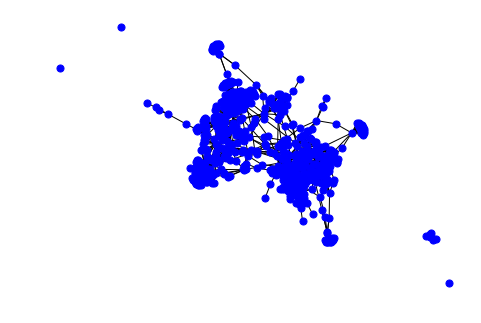

In [13]:
import sys
sys.path.append('../backend/lib')
sys.path.append('../backend')
from GraphSession import GraphSession
from ResultGraph import ResultGraph
from networkx import generate_gml
import networkx as nx
import matplotlib.pyplot as plt
from numpy import sqrt
%matplotlib inline

search_input = "nlp genomics"
graphsession = GraphSession(search_input)
citations = graphsession.get_citations_from_fulltext_mongo(search_input, retmax=200)
resultGraph = ResultGraph()
resultGraph.populate_from_cite_dict(citations)
        
resultGraph.extract_by_connectivity(connectivity=1)
resultGraph.extract_by_connectivity(connectivity=0)
        
# Query metadata
metadataList = graphsession.get_metadataList_from_mongo(resultGraph.nodeIds)
resultGraph.add_metadata_to_graph(metadataList)
resultGraph.get_cy_json()

# Calculate positions
pos = nx.spring_layout(resultGraph.G)

# Draw
nx.draw(resultGraph.G,pos,node_color='b', node_size=50, with_labels=False)

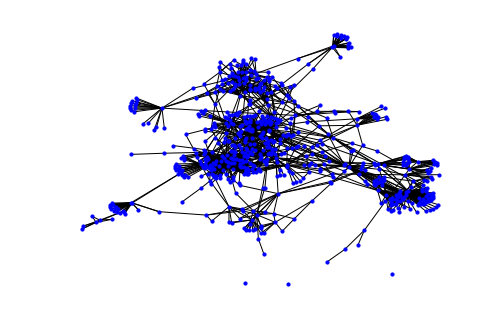

In [50]:
from random import *
seed(1)
#print randint(1,100)
# Calculate positions
#initialpos = {node:(randint(1,100),randint(1,100)) for node in resultGraph.nodeIds}
pos = nx.spring_layout(resultGraph.G, k=1/(sqrt(nx.number_of_nodes(resultGraph.G))*0.5), iterations=50)
#pos = nx.spectral_layout(resultGraph.G)

# Draw
nx.draw(resultGraph.G,pos,node_color='b', node_size=10, with_labels=False)

In [16]:
from numpy import sqrt

In [2]:
import sys
sys.path.append('../backend/lib')
sys.path.append('../backend')
from GraphSession import GraphSession
from ResultGraph import ResultGraph
from networkx import generate_gml
from MongoSession import MongoSession


search_input = "martincorena skin cancer stratton"
graphsession = GraphSession(search_input)
#citations = graphsession.get_citations_from_fulltext_mongo(search_input, retmax=10)
graphsession.get_cy_json()

#print searched_pmc

# Query references for the searched_pmc
#mg = MongoSession.fromConnectionString()
#pmcCursor = mongoSession.findPublicationByPMID(pmid)
#pmid_refs = mg.findRefsOfPMC(searched_pmc)
#print pmid_refs
# Query metadata for all articles

#resultGraph = ResultGraph()
#resultGraph.populate_from_cite_dict(citations)
#print resultGraph.nodeIds
#metadataList = graphsession.get_metadataList_from_mongo(resultGraph.nodeIds)
#for node in resultGraph.G:
#    print (resultGraph.G.node[node]['name'],)
#    print [dict['Id'] for dict in metadataList if str(dict['Id']) in (str(resultGraph.G.node[node]['name']),)][0]
#    break
#print metadataList

#resultGraph.add_metadata_to_graph(metadataList)
#resultGraph.get_cy_json()
#resultGraph.G

#resultGraph.G
#resultGraph.get_graph()
#citations
#citations
#print len(citations)

12/01/2017 04:24:31 PM [INFO]: RequestFullTextSearch: Creating request
12/01/2017 04:24:31 PM [INFO]: GraphSession: Search input received: martincorena skin cancer stratton
12/01/2017 04:24:31 PM [INFO]: ConnectEutils: Connecting to eutils API:
 https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pmc&tool=graphsearch&sort=relevance&term=martincorena+skin+cancer+stratton&retmax=200
12/01/2017 04:24:32 PM [INFO]: MongoSession: Mongo db connection successful
12/01/2017 04:24:33 PM [INFO]: MongoSession: Mongo db connection successful


'{"nodes": [{"group": "Cited", "pubDate": "Jan 2013", "title": "Deciphering signatures of mutational processes operative in human cancer.", "journal": "Cell reports", "label": "23318258", "authors": "Alexandrov, Nik-Zainal, Wedge ...", "id": "23318258"}, {"group": "Cited", "pubDate": "May 2015", "title": "Tumor evolution. High burden and pervasive positive selection of somatic mutations in normal human skin.", "journal": "Science (New York, N.Y.)", "label": "25999502", "authors": "Martincorena, Roshan, Gerstung ...", "id": "25999502"}, {"group": "Cited", "pubDate": "Apr 2009", "title": "The cancer genome.", "journal": "Nature", "label": "19360079", "authors": "Stratton, Campbell, Futreal ...", "id": "19360079"}, {"group": "Cited", "pubDate": "Jan 2014", "title": "Discovery and saturation analysis of cancer genes across 21 tumour types.", "journal": "Nature", "label": "24390350", "authors": "Lawrence, Stojanov, Mermel ...", "id": "24390350"}, {"group": "Searched", "pubDate": "May 2016",

In [ ]:
graphsession.loadCitations